# Time Series Analysis Jupyter Notebook

In [1]:
import numpy as np
import scipy.stats as stats
import statsmodels.tsa as tsa
from scipy import ndimage
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

In [2]:
class WhiteNoise:
    def __init__(self, mean = 0, variance = 1):
        self.mean = mean
        self.variance = variance
        self.distribution = stats.norm(
            loc = self.mean,
            scale = np.sqrt(self.variance)
        )
    
    def generate(self, n_steps):
        return self.distribution.rvs(size = n_steps)
    

In [3]:
noise_model = WhiteNoise()
noise = noise_model.generate(500)

In [4]:
noise_acf = acf(noise, nlags = 40, fft = True)

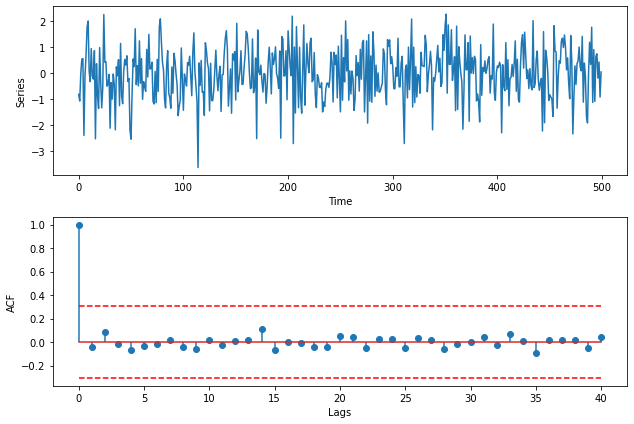

In [5]:
fig, ax = plt.subplots(2,1, figsize = (9,6))
# Plot series
ax[0].plot(noise)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Series')
# Plot autocorrelation
threshold = 1.96/np.sqrt(len(noise_acf))
ax[1].stem(noise_acf)
ax[1].hlines(threshold, xmin = 0, xmax = 40, 
             color = 'r', linestyle = '--')
ax[1].hlines(-threshold, xmin = 0, xmax = 40, 
             color = 'r', linestyle = '--')
ax[1].set_xlabel('Lags')
ax[1].set_ylabel('ACF')
plt.tight_layout()
plt.show()

In [6]:
from statsmodels.graphics.tsaplots import *

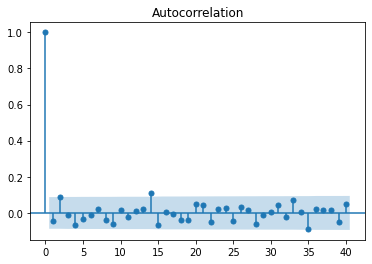

In [7]:
plot_acf(noise, lags = 40);

In [8]:
class RandomWalk:
    
    def __init__(self, mean = 0, variance = 1):
        self.mean = mean
        self.variance = variance
        self.steps = stats.norm( loc = self.mean, 
                                  scale = np.sqrt(self.variance)
                                 )
        
    def generate(self, n_steps):
        walk = self.steps.rvs( size = n_steps).cumsum()
        return walk

In [11]:
model = RandomWalk()
walk = model.generate(500)
walk_acf = acf(walk, nlags = 40, fft = True)

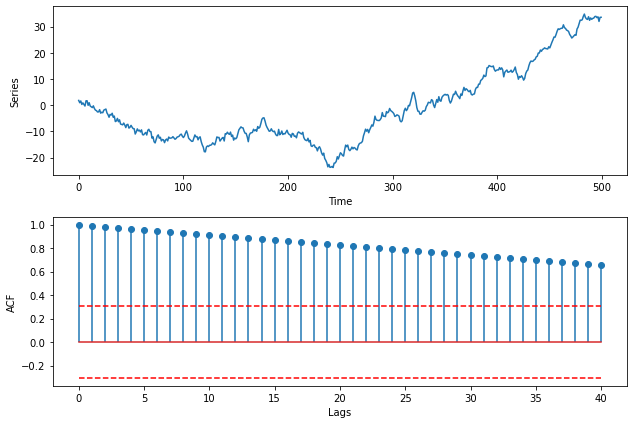

In [12]:
fig, ax = plt.subplots(2,1, figsize = (9,6))
# Plot series
ax[0].plot(np.arange(0, len(walk)), walk)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Series')
# Plot autocorrelation
threshold = 1.96/np.sqrt(len(walk_acf))
ax[1].stem(walk_acf)
ax[1].hlines(threshold, xmin = 0, xmax = 40, 
             color = 'r', linestyle = '--')
ax[1].hlines(-threshold, xmin = 0, xmax = 40, 
             color = 'r', linestyle = '--')
ax[1].set_xlabel('Lags')
ax[1].set_ylabel('ACF')
plt.tight_layout()
plt.show()

In [34]:
class MAProcess:
    
    def __init__(self, coefficients, mean = 0, variance = 1):
        self.underlying = stats.norm( loc = mean, 
                                     scale = np.sqrt(variance))
        self.order = len(coefficients) - 1
        self.coefficients = np.array(coefficients)
    
    def generate(self, n_steps):
        np.random.seed(seed=233423)
        z = self.underlying.rvs( size = n_steps)
        ma_series = np.array([
            np.dot(
                self.coefficients, 
                ndimage.shift(z, self.order - t)[:self.order + 1][::-1]
            ) for t in range(n_steps)]
        )
        return ma_series      

In [14]:
coeff1 = np.array([1, -0.8])
ma1_model = MAProcess(coeff1)
ma1_series = ma1_model.generate(500)
ma1_series_acf = acf(ma1_series, nlags = 40, fft = True)

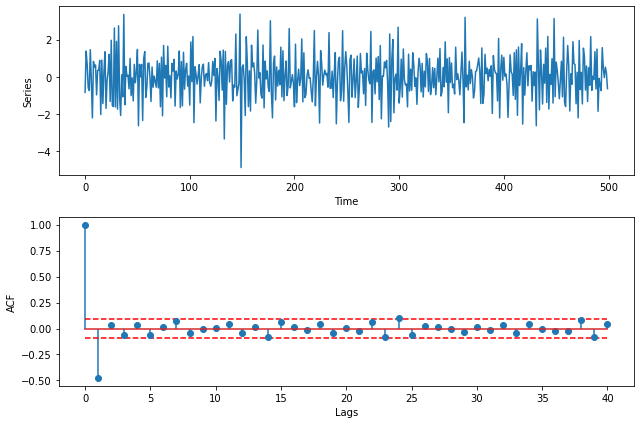

In [15]:
fig, ax = plt.subplots(2,1, figsize = (9,6))
# Plot Series
ax[0].plot(ma1_series)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Series')
# Plot ACF
threshold = 1.96/np.sqrt(len(ma1_series))
ax[1].stem(ma1_series_acf)
ax[1].hlines(threshold, xmin = 0, xmax = 40, 
             color = 'r', linestyle = '--')
ax[1].hlines(-threshold, xmin = 0, xmax = 40, 
             color = 'r', linestyle = '--')
ax[1].set_xlabel('Lags')
ax[1].set_ylabel('ACF')
plt.tight_layout()
plt.show()

In [16]:
coeff2 = np.array([1, 0.7, -0.2])
ma2_model = MAProcess(coeff2)
ma2_series = ma2_model.generate(500)
ma2_series_acf = acf(ma2_series, nlags = 40, fft = True)

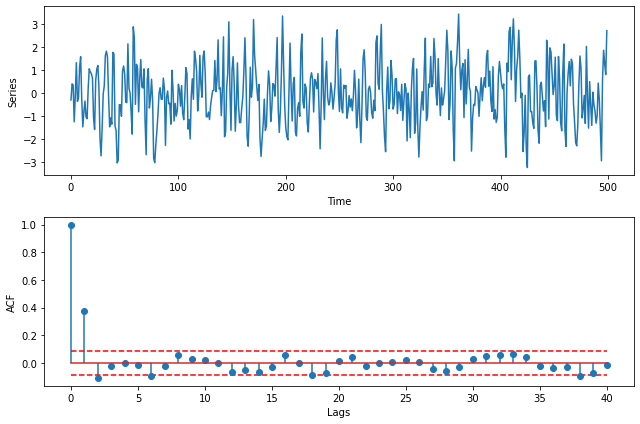

In [17]:
fig, ax = plt.subplots(2,1, figsize = (9,6))
# Plot Series
ax[0].plot(ma2_series)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Series')
# Plot ACF
threshold = 1.96/np.sqrt(len(ma2_series))
ax[1].stem(ma2_series_acf)
ax[1].hlines(threshold, xmin = 0, xmax = 40, 
             color = 'r', linestyle = '--')
ax[1].hlines(-threshold, xmin = 0, xmax = 40, 
             color = 'r', linestyle = '--')
ax[1].set_xlabel('Lags')
ax[1].set_ylabel('ACF')
plt.tight_layout()
plt.show()

In [74]:
theta = -0.5 
size = 5000
coeff_A = np.array([1, theta])
ma_A_model = MAProcess(coeff_A)
ma_A_series = ma_A_model.generate(size)
ma_A_series_acf = acf(ma_A_series, nlags = 40, fft = True)

coeff_B = np.array([1, 1/theta ])
ma_B_model = MAProcess(coeff_B)
ma_B_series = ma_B_model.generate(size)
ma_B_series_acf = acf(ma_B_series, nlags = 40, fft = True)

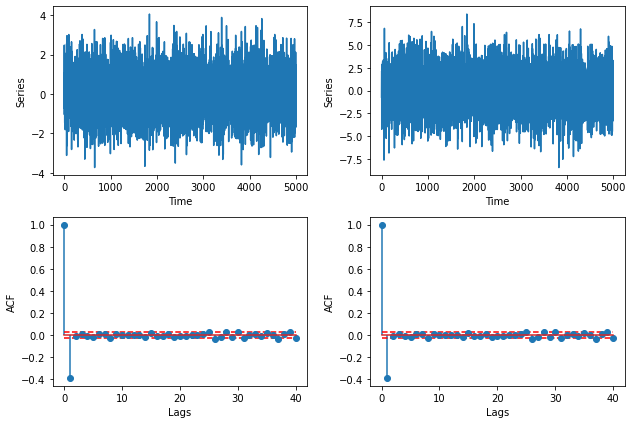

In [75]:
fig, ax = plt.subplots(2,2, figsize = (9,6))
# MODEL A
# Plot Series
ax[0,0].plot(ma_A_series)
ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('Series')
# Plot ACF
threshold = 1.96/np.sqrt(len(ma_A_series))
ax[1,0].stem(ma_A_series_acf)
ax[1,0].hlines(threshold, xmin = 0, xmax = 40, 
             color = 'r', linestyle = '--')
ax[1,0].hlines(-threshold, xmin = 0, xmax = 40, 
             color = 'r', linestyle = '--')
ax[1,0].set_xlabel('Lags')
ax[1,0].set_ylabel('ACF')

# MODEL B
# Plot Series
ax[0,1].plot(ma_B_series)
ax[0,1].set_xlabel('Time')
ax[0,1].set_ylabel('Series')
# Plot ACF
threshold = 1.96/np.sqrt(len(ma_B_series))
ax[1,1].stem(ma_B_series_acf)
ax[1,1].hlines(threshold, xmin = 0, xmax = 40, 
             color = 'r', linestyle = '--')
ax[1,1].hlines(-threshold, xmin = 0, xmax = 40, 
             color = 'r', linestyle = '--')
ax[1,1].set_xlabel('Lags')
ax[1,1].set_ylabel('ACF')

plt.tight_layout()
plt.show()

In [66]:
np.linalg.norm(ma_A_series_acf - ma_B_series_acf)

0.018552722933653155

In [76]:
ma_A_series_acf[1]

-0.3887794591280239

In [77]:
ma_B_series_acf[1]

-0.3886864580374679

In [72]:
theta/(1 + theta**2)

-0.4

## Invertibility of $\text{MA}(q)$ Processes:

Let $\{Z_t\}$ be a purely random process with zero mean and variance $\sigma^2_Z$.

The invertibility condition for an $\text{MA}(q)$ process is best expressing by using the backward shift operator, denoted by $B$, which is defined by
$$B^j X_t = X_{t-j} \text{ for all } j \in [\![0,+\infty]\!].$$

We may then express an $\text{MA}(q)$ process
$$X_t = \beta_0 Z_t + \beta_1 Z_{t-1} + \cdots + \beta_q Z_{t-q}$$
as
$$X_t = \left(\beta_0+\beta_1 B + \cdots + \beta_q B^q\right)Z_t =: \theta(B)Z_t$$
where $\theta(B)$ is the characteristic polynomial $\beta_0+\beta_1 B + \cdots + \beta_q B^q$.

By (a version of) the fundamental theorem of algebra, this operator can be factored as
$$\theta(B) = (I+\tau_1 B) \cdots (I+\tau_q B),$$
where $\theta_1, \cdots, \theta_q$ may take complex values and $I$ denotes the identity operator. The inverse of $\theta(B)$ is then the product of the inverses of the operators $\left\{I+\tau_i B\right\}_{i = 1, \cdots, q}$ and thus invertible if and only if each $I+\tau_i B$ is invertible.

The backshift operator $B$ acts on a space of sequences. If this space of sequences is Banach, then so is the space of bounded linear operators over this space. In this situation, provided that the backshift operator $B$ is bounded, Theorem 10.12 [here](https://link.springer.com/chapter/10.1007%2F978-1-4612-0559-3_10), [the Neumann series](https://en.wikipedia.org/wiki/Neumann_series)
$$\left(I+\tau_i B\right)^{-1} = \left(I-(-\tau_i)B\right)^{-1} = \sum_{k = 0}^{\infty} (-\tau_i)^k B^k$$
converges in the operator norm if $r(B) < 1/|\tau_i|$, equivalently if $|\tau_i| < 1/r(B)$; and diverges if $r(B) > 1/|\tau_i|$, equivalently if $|\tau_i| < 1/r(B)$. Here, $r(B)$ denotes the [spectral radius](https://en.wikipedia.org/wiki/Spectral_radius) of $B$. In our specific case, [the spectral radius of $B$ equals 1](https://www.diva-portal.org/smash/get/diva2:730944/FULLTEXT01.pdf). [We also have this convergence under the weaker condition that $\left\lVert \tau_i B\right\rVert \leq 1$, which is the same as the previous condition for convergence, in this case, since $\left\lVert B \right\rVert = 1$.](https://www.diva-portal.org/smash/get/diva2:730944/FULLTEXT01.pdf)

(Necessary conditions for invertibility are listed [here](https://math.stackexchange.com/a/3788251).)

In conclusion, if every $\tau_i$ lies inside the unit circle, the operator $\theta(B)$ is invertible. Equivalently, if every $-1/\tau_i$ lies outside the unit circle, $\theta(B)$ is invertible.
